In [2]:
import logging
import os
from pathlib import Path
import sys
from typing import List, Union

from pytorch_lightning.plugins import DDPPlugin

# sys.path.insert(0, Path(__file__).absolute().parents[1].as_posix())
import calvin_agent.models.play_lmp as models_m
from calvin_agent.utils.utils import get_git_commit_hash, get_last_checkpoint, print_system_env_info
import hydra
from omegaconf import DictConfig, ListConfig, OmegaConf
from pytorch_lightning import Callback, LightningModule, seed_everything, Trainer
from pytorch_lightning.loggers import LightningLoggerBase
from pytorch_lightning.utilities import rank_zero_only

In [7]:
def wrap_train(config_name):
    @hydra.main(config_path="../conf", config_name=f"{config_name}.yaml")
    def train(cfg: DictConfig) -> None:
        # sets seeds for numpy, torch, python.random and PYTHONHASHSEED.
        seed_everything(cfg.seed, workers=True)  # type: ignore
        datamodule = hydra.utils.instantiate(cfg.datamodule)
#         chk = get_last_checkpoint(Path.cwd())

#         # Load Model
#         if chk is not None:
#             model = getattr(models_m, cfg.model["_target_"].split(".")[-1]).load_from_checkpoint(chk.as_posix())
#         else:
#             model = hydra.utils.instantiate(cfg.model)

#         log_rank_0(f"Training with the following config:\n{OmegaConf.to_yaml(cfg)}")
#         log_rank_0("Repo commit hash: {}".format(get_git_commit_hash(Path(hydra.utils.to_absolute_path(__file__)))))
#         log_rank_0(print_system_env_info())

#         train_logger = setup_logger(cfg, model)
#         callbacks = setup_callbacks(cfg.callbacks)

#         trainer_args = {
#             **cfg.trainer,
#             "logger": train_logger,
#             "callbacks": callbacks,
#             "resume_from_checkpoint": chk,
#             "benchmark": False,
#         }

#         # Configure multi-GPU training
#         if is_multi_gpu_training(trainer_args["gpus"]):  # type: ignore
#             trainer_args["accelerator"] = "ddp"
#             trainer_args["plugins"] = DDPPlugin(find_unused_parameters=False)
#             # trainer_args["plugins"] = "ddp_sharded"

#             if not cfg.slurm:
#                 modify_argv_hydra()

#         trainer = Trainer(**trainer_args)

#         # Start training
#         trainer.fit(model, datamodule=datamodule)

    train()

In [8]:
def setup_config():
    config_str = next((x for x in sys.argv if "config_name" in x), None)
    if config_str is not None:
        config_name = config_str.split("=")[1]
        sys.argv.remove(config_str)
        os.environ["HYDRA_CONFIG_NAME"] = config_name
        return config_name
    elif "HYDRA_CONFIG_NAME" in os.environ:
        return os.environ["HYDRA_CONFIG_NAME"]
    else:
        return "config"

In [9]:
conf = setup_config()
conf

'config'

In [10]:
wrap_train(conf)

usage: ipykernel_launcher.py [--help] [--hydra-help] [--version]
                             [--cfg {job,hydra,all}] [--resolve]
                             [--package PACKAGE] [--run] [--multirun]
                             [--shell-completion] [--config-path CONFIG_PATH]
                             [--config-name CONFIG_NAME]
                             [--config-dir CONFIG_DIR]
                             [--info [{all,config,defaults,defaults-tree,plugins,searchpath}]]
                             [overrides [overrides ...]]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

/home/robert/anaconda3/envs/calvin_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3450: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [18]:
import numpy as np
lang_data = np.load('dataset/calvin_debug_dataset/training/lang_annotations/auto_lang_ann.npy', allow_pickle=True).reshape(-1)[0]
lang_data

{'language': {'ann': ['move the light switch to turn on the yellow light',
   'sweep the pink block to the right',
   'place the block in the sliding cabinet',
   'pick up the red block from the table',
   'in the slider grasp the blue block',
   'slide down the switch',
   'pick up the red block on the table',
   'place in slider',
   'turn off the light bulb'],
  'task': ['turn_on_lightbulb',
   'push_pink_block_right',
   'place_in_slider',
   'lift_red_block_table',
   'lift_blue_block_slider',
   'turn_off_lightbulb',
   'lift_red_block_table',
   'place_in_slider',
   'turn_off_lightbulb'],
  'emb': array([[[ 0.52925   ,  0.09874008,  0.15309368, ...,  0.6170549 ,
           -0.14766425,  0.21653481]],
  
         [[ 0.11232971, -0.14778604,  0.38895708, ...,  0.40465486,
            0.4906702 ,  0.2589114 ]],
  
         [[-0.04571903, -0.0061444 ,  0.27441305, ...,  0.07715372,
           -0.02765487,  0.1338684 ]],
  
         ...,
  
         [[-0.2222732 ,  0.02141502,  0.29

In [19]:
lang_data.keys()

dict_keys(['language', 'info'])

In [20]:

lang_data_para = np.load('dataset/calvin_debug_dataset/training/lang_paraphrase-MiniLM-L3-v2/auto_lang_ann.npy', allow_pickle=True).reshape(-1)[0]
lang_data_para

{'language': {'ann': ['move the light switch to turn on the yellow light',
   'sweep the pink block to the right',
   'place the block in the sliding cabinet',
   'pick up the red block from the table',
   'in the slider grasp the blue block',
   'slide down the switch',
   'pick up the red block on the table',
   'place in slider',
   'turn off the light bulb'],
  'task': ['turn_on_lightbulb',
   'push_pink_block_right',
   'place_in_slider',
   'lift_red_block_table',
   'lift_blue_block_slider',
   'turn_off_lightbulb',
   'lift_red_block_table',
   'place_in_slider',
   'turn_off_lightbulb'],
  'emb': array([[[ 0.52925   ,  0.09874008,  0.15309368, ...,  0.6170549 ,
           -0.14766425,  0.21653481]],
  
         [[ 0.11232971, -0.14778604,  0.38895708, ...,  0.40465486,
            0.4906702 ,  0.2589114 ]],
  
         [[-0.04571903, -0.0061444 ,  0.27441305, ...,  0.07715372,
           -0.02765487,  0.1338684 ]],
  
         ...,
  
         [[-0.2222732 ,  0.02141502,  0.29

In [26]:
lang_data_para = np.load('dataset/calvin_debug_dataset/training/ep_lens.npy', allow_pickle=True)#.reshape(-1)[0]
lang_data_para

array(2771)

In [25]:
lang_data_para = np.load('dataset/calvin_debug_dataset/training/ep_start_end_ids.npy', allow_pickle=True)#.reshape(-1)[0]
lang_data_para

array([[358482, 361252]])

In [27]:
lang_data_para = np.load('dataset/calvin_debug_dataset/training/scene_info.npy', allow_pickle=True)#.reshape(-1)[0]
lang_data_para

array({'calvin_scene_D': [358482, 361252]}, dtype=object)

In [31]:
# Videos

vid = np.load('dataset/calvin_debug_dataset/training/episode_0358482.npz')
vid

In [37]:
vid.files

['actions',
 'rel_actions',
 'robot_obs',
 'scene_obs',
 'rgb_static',
 'rgb_gripper',
 'rgb_tactile',
 'depth_static',
 'depth_gripper',
 'depth_tactile']

In [39]:
vid['actions'].shape

(7,)

In [40]:
vid['rgb_static'].shape

(200, 200, 3)

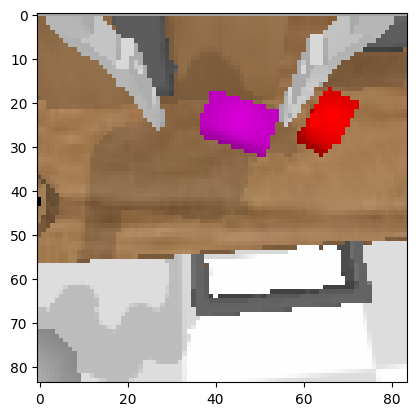

In [43]:
import matplotlib.pyplot as plt

plt.imshow(vid['rgb_static'])

TypeError: Invalid shape (24,) for image data

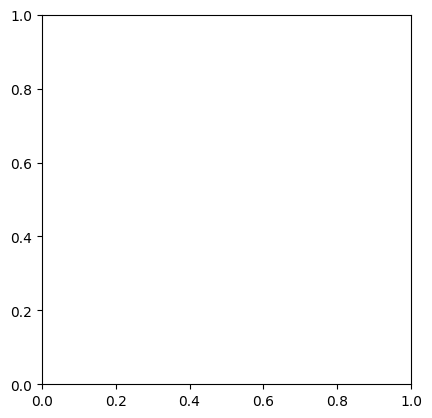

In [42]:
plt.imshow(vid['scene_obs'])